In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
df = pd.read_csv('Placement_Data_Full_Class.csv')

In [3]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [5]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [6]:
df['salary'].fillna(0, inplace = True)

In [7]:
df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [8]:
df_gender_analysis = df[['gender', 'status']].groupby(['gender'], as_index = False).count()
df_gender_analysis1 = df.loc[df['status']== 'Placed'].groupby(['gender'],as_index = False).count()
df_gender_analysis['Placed'] = df_gender_analysis1['status']
df_gender_analysis['Placed_Percent'] = df_gender_analysis['Placed']/df_gender_analysis['status']*100
df_gender_analysis.rename(columns = {'gender':'Gender' , 'status':'Number_of_Students'})

,Gender,Number_of_Students,Placed,Placed_Percent
0,F,76,48,63.157895
1,M,139,100,71.942446


In [9]:
df_gender_analysis2 = df[['gender','salary']].groupby(['gender'], as_index = False).mean()
df_gender_analysis2

,gender,salary
0,F,168815.789474
1,M,215043.165468


C:\Users\revan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


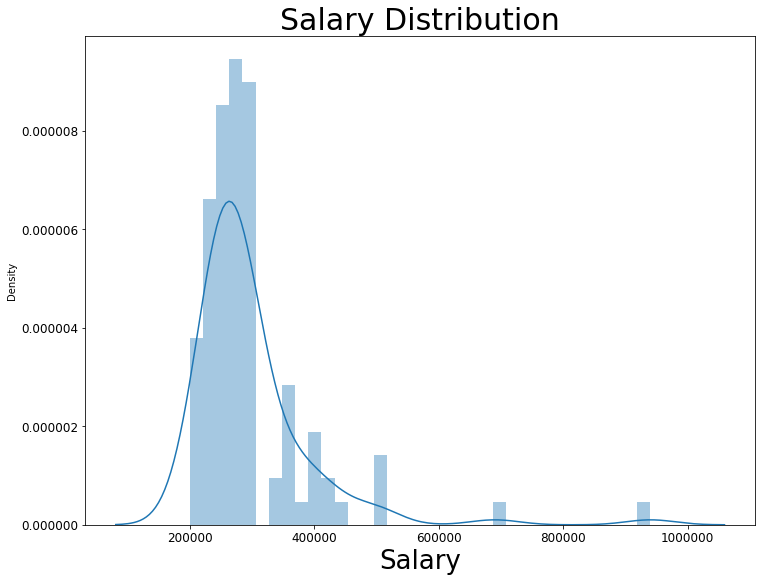

In [10]:
plt.figure(figsize=(12,9))
df_male = df.loc[df['gender'] == 'M']
ax = sns.distplot(df_male['salary'].loc[df['salary']!=0])
ax.ticklabel_format(style = 'plain')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Salary Distribution",fontsize=30)
plt.xlabel('Salary',fontsize=26)
plt.show()

C:\Users\revan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\revan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


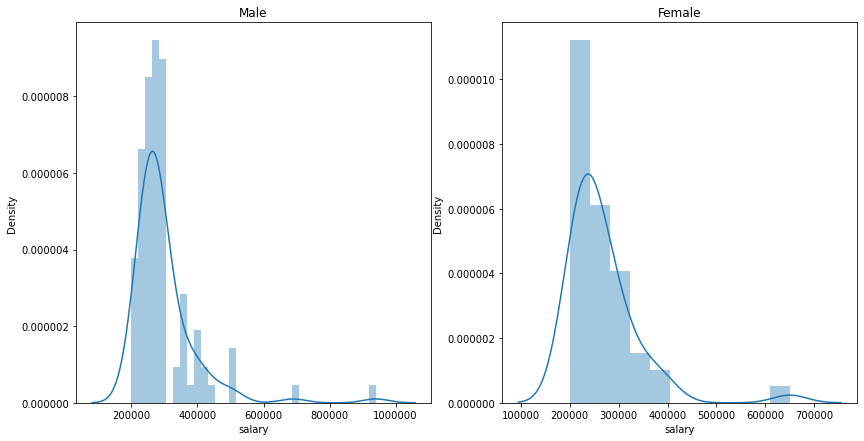

In [11]:
fig, ax =plt.subplots(1,2 , figsize = (14,7))
df_male = df.loc[df['gender'] == 'M']
df_female = df.loc[df['gender'] == 'F']
sns.distplot(df_male['salary'].loc[df['salary']!=0] , ax = ax[0])
sns.distplot(df_female['salary'].loc[df['salary']!=0] , ax = ax[1])
ax[0].ticklabel_format(style = 'plain')
ax[1].ticklabel_format(style = 'plain')
ax[0].set_title("Male")
ax[1].set_title("Female")
plt.show()

In [12]:
#Deviation is less for males than compared to females which means most people get salary close to mean salary.

<AxesSubplot:xlabel='workex', ylabel='count'>

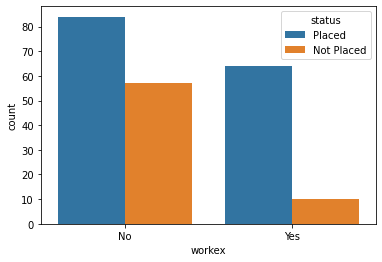

In [13]:
sns.countplot(x = 'workex' , data =df , hue = 'status')

In [14]:
##From the graph there is huge difference between placed count and unplaced for people having work expereince.That means with work experience you are more likely to get placed as compared to wth no work experience.Work Experience is an imortant factor for your placement.It increases your chances of getting a placement.Now lets see the impact of work experience on salary.

In [15]:
df[['workex','salary']].groupby(['workex']).mean()

,salary
workex,
No,165333.333333
Yes,262283.783784


In [16]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [17]:
# Work ex mean salary is higher as expected

<AxesSubplot:xlabel='workex', ylabel='salary'>

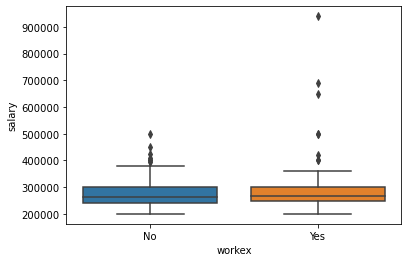

In [18]:
sns.boxplot(x = 'workex' , y = 'salary' , data=df.loc[df['status'] == 'Placed'])

C:\Users\revan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\revan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


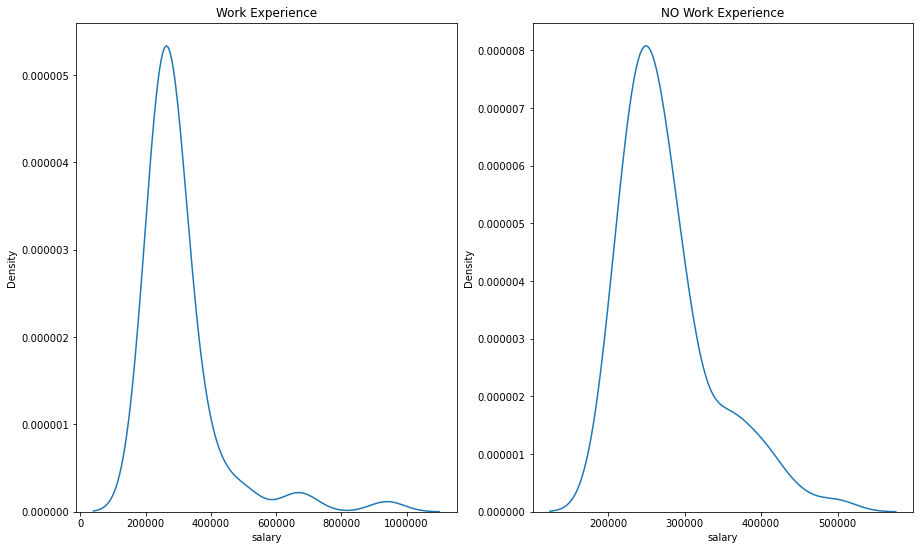

In [19]:
figure , ax = plt.subplots(1,2 , figsize = (15,9))
df1 = df.loc[df['status'] == 'Placed']
sns.distplot(df1.loc[df['workex'] =='Yes']['salary'], hist = False,ax = ax[0])
ax[0].set_title('Work Experience')
sns.distplot(df1.loc[df['workex'] =='No']['salary'], hist = False,ax = ax[1])
ax[1].set_title('NO Work Experience')
ax[0].ticklabel_format(style = 'plain')
ax[1].ticklabel_format(style = 'plain')

In [20]:
# Workex people have higher salaries as compared to no work experience.Hence we can say with work experience you can get a placement with more salary than with no work experience.

In [21]:
df_boards_analysis = df[['ssc_b','status']].groupby(['ssc_b'], as_index = False).count()
df_boards_analysis1 = df.loc[df['status'] == 'Placed'].groupby(['ssc_b'], as_index = False).count()
df_boards_analysis['Placed'] = df_boards_analysis1['status']
df_boards_analysis['Placed_Percent'] = df_boards_analysis['Placed']/df_boards_analysis['status']*100
df_boards_analysis.rename(columns = {'ssc_b':'SSC_Board' , 'status':'Total_Students'})


,SSC_Board,Total_Students,Placed,Placed_Percent
0,Central,116,78,67.241379
1,Others,99,70,70.707071


In [22]:
#There is not much difference in placed percent so sscboard does not play an important role in deciding placement status.

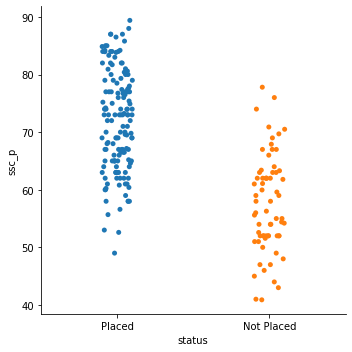

In [23]:
sns.catplot(x = 'status' , y = 'ssc_p' , data = df )

In [24]:
#Students who have more ssc percentage got placement .People below 50% were unplaced

<AxesSubplot:xlabel='status', ylabel='ssc_p'>

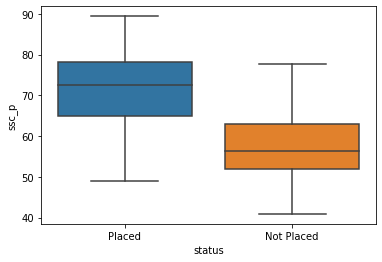

In [25]:
sns.boxplot(x = 'status' , y = 'ssc_p' , data = df )

In [26]:
#ssc percentage influences placement

<AxesSubplot:xlabel='ssc_b', ylabel='salary'>

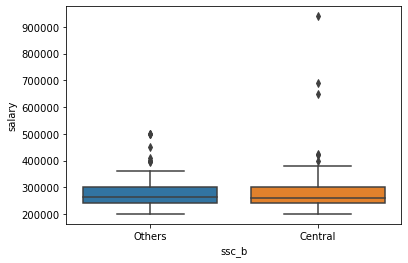

In [27]:
sns.boxplot(x = 'ssc_b' , y = 'salary' , data = df.loc[df['status']=='Placed'])

In [28]:
# ssc board dosent really play an important role in salries, although there are some outliers

In [29]:
df_hscboards_analysis =  df[['hsc_b','status']].groupby(['hsc_b'], as_index = False).count()
df_hscboards_analysis1 = df.loc[df['status'] == 'Placed'].groupby(['hsc_b'],as_index = False).count()
df_hscboards_analysis['Placed'] = df_hscboards_analysis1['status']
df_hscboards_analysis['Placed_Percent'] = df_hscboards_analysis['Placed']/df_hscboards_analysis['status']*100
df_hscboards_analysis.rename(columns = {'hsc_b':'HSC_Board' , 'status':'Total_Students'})

,HSC_Board,Total_Students,Placed,Placed_Percent
0,Central,84,57,67.857143
1,Others,131,91,69.465649


In [30]:
#Same for hsc board it doesnt have much impact on placement as it is almost same for both boards.

<AxesSubplot:xlabel='hsc_b', ylabel='salary'>

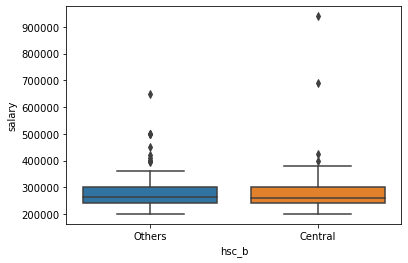

In [31]:
sns.boxplot(x = 'hsc_b', y = 'salary', data = df.loc[df['status']== 'Placed'])

<AxesSubplot:xlabel='status', ylabel='hsc_p'>

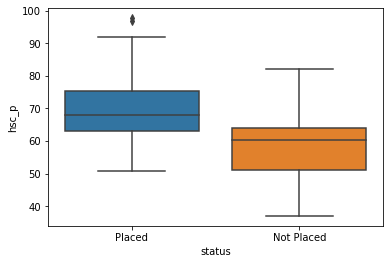

In [32]:
sns.boxplot(x = 'status', y = 'hsc_p', data = df)

In [33]:
df_hscsubject_analysis = df[['hsc_s','status']].groupby(['hsc_s'], as_index = False).count()
df_hscsubject_analysis1 = df.loc[df['status']=='Placed'].groupby(['hsc_s'],as_index = False).count()
df_hscsubject_analysis['Placed'] = df_hscsubject_analysis['status']
df_hscsubject_analysis['Placed_percent'] = df_hscsubject_analysis['Placed']/df_hscsubject_analysis['status']*100
df_hscsubject_analysis.rename(columns = {'hsc_s':'HSC_subject','status': 'Total_students'})

,HSC_subject,Total_students,Placed,Placed_percent
0,Arts,11,11,100.0
1,Commerce,113,113,100.0
2,Science,91,91,100.0


In [34]:
#Students from commerce and sccience background got more placements than arts.We can say HSC subject also has somewhat impact on placement

<AxesSubplot:xlabel='hsc_s', ylabel='salary'>

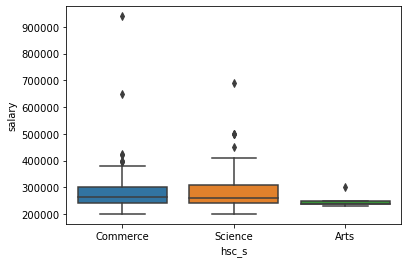

In [35]:
sns.boxplot(x = 'hsc_s', y = 'salary', data = df.loc[df['status'] == 'Placed'])

<AxesSubplot:xlabel='ssc_p', ylabel='hsc_p'>

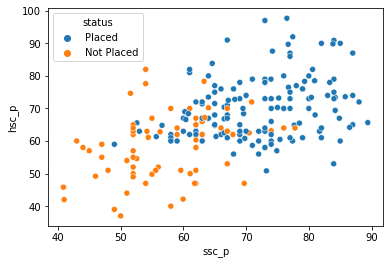

In [36]:
sns.scatterplot(x = 'ssc_p', y = 'hsc_p', data = df, hue = 'status')

<AxesSubplot:xlabel='degree_p', ylabel='hsc_p'>

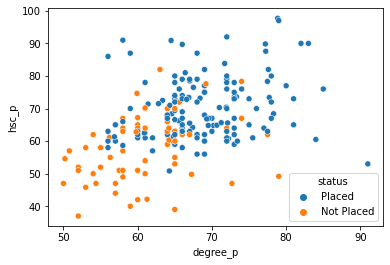

In [37]:
sns.scatterplot(x = 'degree_p', y = 'hsc_p', data = df, hue = 'status')

In [38]:
# percentage plays a major role in placement

<AxesSubplot:xlabel='degree_t', ylabel='count'>

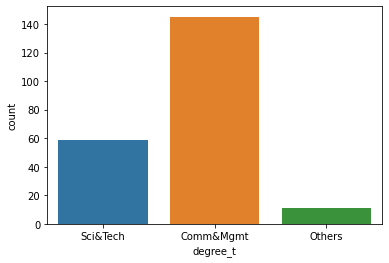

In [39]:
sns.countplot(x = 'degree_t', data = df)

In [40]:
# majority of poeple are from commerce background

In [41]:
df_degree_analysis = df[['degree_t', 'status']].groupby(['degree_t'], as_index = False).count()
df_degree_analysis1 = df.loc[df['status'] == 'Placed'].groupby(['degree_t'], as_index = False).count()
df_degree_analysis['Placed'] = df_degree_analysis1['status']
df_degree_analysis['Placed_Percent'] = df_degree_analysis['Placed']/df_degree_analysis['status']*100
df_degree_analysis.rename(columns = {'degree_t':'Degree_Stream' , 'status':'Total_Students'})

,Degree_Stream,Total_Students,Placed,Placed_Percent
0,Comm&Mgmt,145,102,70.344828
1,Others,11,5,45.454545
2,Sci&Tech,59,41,69.491525


In [42]:
# degree stream affect placement

<AxesSubplot:xlabel='status', ylabel='degree_p'>

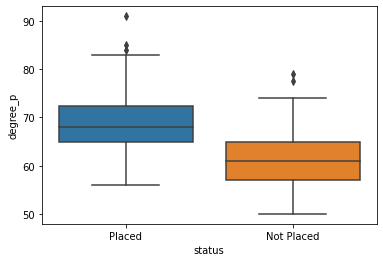

In [43]:
sns.boxplot(x = 'status', y = 'degree_p', data = df)

<AxesSubplot:xlabel='degree_p', ylabel='salary'>

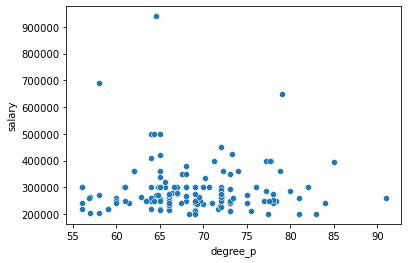

In [44]:
sns.scatterplot(x = 'degree_p' , y= 'salary' , data = df.loc[df['salary'] != 0])

In [45]:
# no strong relation bw degree_p and salary

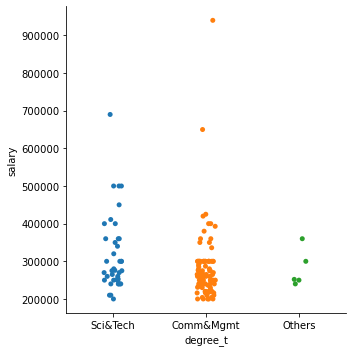

In [46]:
sns.catplot(x = 'degree_t', y = 'salary', data = df.loc[df['salary'] != 0])

<AxesSubplot:xlabel='degree_t', ylabel='salary'>

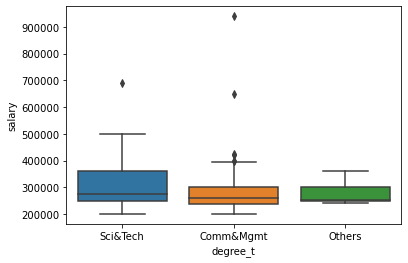

In [47]:
sns.boxplot(x = 'degree_t', y = 'salary', data = df.loc[df['salary'] != 0])

<AxesSubplot:xlabel='mba_p', ylabel='salary'>

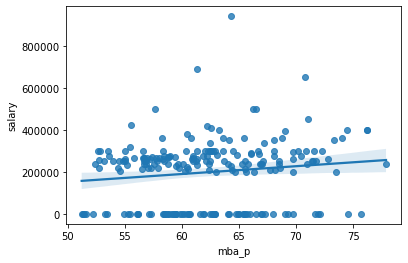

In [48]:
sns.regplot( x = 'mba_p', y = 'salary', data = df)

In [49]:
## no relation bw mba and salary

<AxesSubplot:xlabel='mba_p', ylabel='degree_p'>

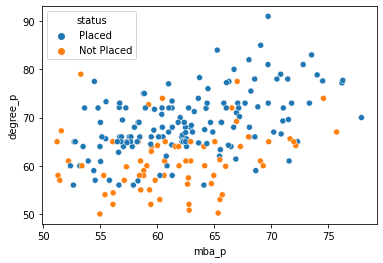

In [50]:
sns.scatterplot(x = 'mba_p', y = 'degree_p', hue = 'status', data = df)

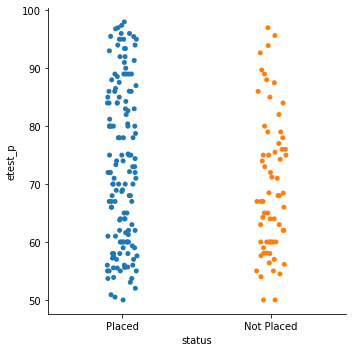

In [51]:
sns.catplot( x= 'status', y = 'etest_p', data = df)

In [52]:
## scores are not that seperate beteeen placed and not placed

In [53]:
df[['status', 'etest_p']].groupby('status').mean()

,etest_p
status,
Not Placed,69.587910
Placed,73.238041


In [54]:
## placement is  not affected bu etest scores

In [55]:
df_specialisation_analysis =  df[['specialisation','status']].groupby(['specialisation'], as_index = False).count()
df_specialisation_analysis1 = df.loc[df['status'] == 'Placed'].groupby(['specialisation'],as_index = False).count()
df_specialisation_analysis['Placed'] = df_specialisation_analysis1['status']
df_specialisation_analysis['Placed_Percent'] = df_specialisation_analysis['Placed']/df_specialisation_analysis['status']*100
df_specialisation_analysis.rename(columns = {'specialisation':'MBA_specialisation' , 'status':'Total_Students'})

,MBA_specialisation,Total_Students,Placed,Placed_Percent
0,Mkt&Fin,120,95,79.166667
1,Mkt&HR,95,53,55.789474


In [56]:
## marketing and finance students have a better chance in getting placed

<AxesSubplot:xlabel='specialisation', ylabel='salary'>

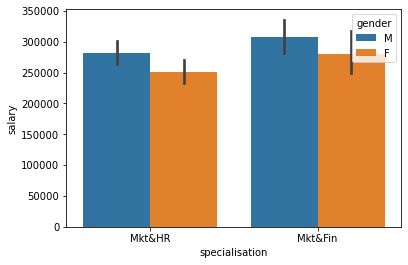

In [57]:
sns.barplot(x = 'specialisation', y = 'salary', data = df.loc[df['status']== 'Placed'], hue = 'gender')

In [58]:
## male employees earn more than female employees

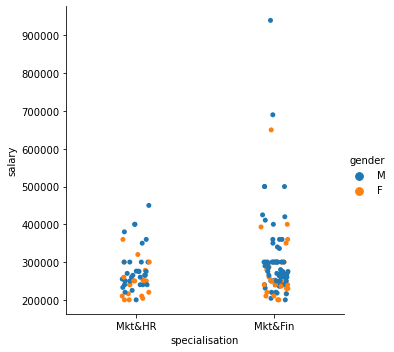

In [59]:
sns.catplot(x = 'specialisation', y = 'salary', data = df.loc[df['status']== 'Placed'], hue = 'gender')

In [60]:
df = pd.get_dummies(df,columns = ['status'])
df = pd.get_dummies(df,columns = ['specialisation'])
df = pd.get_dummies(df,columns = ['gender'])

In [61]:
df.rename(columns = {'status_Not Placed':'Not Placed' , 'status_Placed':'Placed' ,
                    'specialisation_Mkt&Fin':'Marketting and Finance' , 'specialisation_Mkt&HR':'Marketting and HR',
                    'gender_F':'Female' , 'gender_M':'Male'}, inplace =True)

In [62]:
df.corrwith(df['Placed'])

sl_no                    -0.026859
ssc_p                     0.607889
hsc_p                     0.491228
degree_p                  0.479861
etest_p                   0.127639
mba_p                     0.076922
salary                    0.865774
Not Placed               -1.000000
Placed                    1.000000
Marketting and Finance    0.250655
Marketting and HR        -0.250655
Female                   -0.090670
Male                      0.090670
dtype: float64

In [63]:
##placement has  very high correlation with ssc percentage